## DATA 601 - Project 2 - Solar Electric Programs Reported by NYSERDA: Beginning 2000

Dataset Name:  Solar Electric Programs Reported by NYSERDA: Beginning 2000

Description: https://data.ny.gov/Energy-Environment/Solar-Electric-Programs-Reported-by-NYSERDA-Beginn/3x8r-34rs

CSV link:   https://data.ny.gov/api/views/3x8r-34rs/rows.csv?accessType=DOWNLOAD

Rows: 105,337 + 1 header

Columns: 30

Size: 33.9 MB

Cost: Free

It has more than 2 data types.

I found this dataset on  https://www.data.gov website. I had searched for the keywords "solar power generation csv" in Google and this was the first website that came up.

The dataset has records for solar projects that were set up in New York. I have no prior training in the data. I chose this dataset as this was the only one dataset that met the requirements and I was able to interpret some meaning out of it.


### Hypotheses 1
The data has two date columns "Date Application Received" and "Date Completed", which provide the start and end date of the solar projects.

The dataset has solar project records from 2000 to 2019. This would be the time span. The data for 2020 would not be considered as the complete data is not available. Looking at the dataset the number of solar projects should have increased by 5000 times over the years from 2000 to 2019.

#### YES


### Hypotheses 2
I could use the "Total Nameplate kW DC" and "Project Cost" to calculate the cost of the project per kilowatt (kW) produce over the years from 2000 to 2019. The cost should have reduced by more than 50%.

#### YES

In [1]:
#Intializing libraries

import time
import datetime
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import pandas as pd
import numpy as np
print('Pandas',pd.__version__)
import seaborn as sns
print('sns',sns.__version__)

Pandas 0.25.1
sns 0.9.0


In [2]:
#Reading CSV

start_time = time.time()
df = pd.read_csv("https://data.ny.gov/api/views/3x8r-34rs/rows.csv?accessType=DOWNLOAD", low_memory=False)
pd.set_option("display.max_rows", 999)
pd.set_option("display.max_columns", 999)

In [3]:
#Dataframe Shape

df.shape

(105337, 30)

In [4]:
#Full summary of the dataframe to know the data types of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105337 entries, 0 to 105336
Data columns (total 30 columns):
Reporting Period                         105337 non-null object
Project Number                           105337 non-null object
City                                     105337 non-null object
County                                   105337 non-null object
State                                    105337 non-null object
Zip Code                                 105337 non-null int64
Sector                                   105337 non-null object
Program Type                             105337 non-null object
Solicitation                             105337 non-null object
Electric Utility                         105337 non-null object
Purchase Type                            100228 non-null object
Date Application Received                105337 non-null object
Date Completed                           101418 non-null object
Project Status                           105337 non-null o

In [5]:
#First 5 rows

df.head()

,Reporting Period,Project Number,City,County,State,Zip Code,Sector,Program Type,Solicitation,Electric Utility,Purchase Type,Date Application Received,Date Completed,Project Status,Contractor,Primary Inverter Manufacturer,Primary Inverter Model Number,Total Inverter Quantity,Primary PV Module Manufacturer,PV Module Model Number,Total PV Module Quantity,Project Cost,$Incentive,Total Nameplate kW DC,Expected KWh Annual Production,Remote Net Metering,Affordable Solar,Community Distributed Generation,Green Jobs Green New York Participant,Location 1
0,02/29/2020,4154-0227-Financing,Medford,Suffolk,NY,11763,Residential,Residential/Small Commercial,PON 2112LI,PSEG Long Island,Purchase,07/11/2016,09/29/2016,Complete,Green Logic LLC,SMA America,SB5000TL-US-22 (240V),2.0,SunPower,SPR-E20-327,39.0,49146.0,0.0,12.75,14970.0,No,No,No,Residential,"Medford, NY 11763\n(40.822436, -72.982416)"
1,02/29/2020,4473-101564,Malden On Hudson,Ulster,NY,12453,Residential,Residential/Small Commercial,PON 2112,Central Hudson Gas and Electric,Purchase,07/26/2016,09/26/2016,Complete,Lighthouse Solar (dba for Sun Source Technolog...,SolarEdge Technologies,SE3000 (240V) w/ -ER-US or A-US,1.0,LG Electronics Solar Cell Division,LG315N1C-G4,8.0,8934.0,2016.0,2.52,2958.0,No,Yes,No,NaN,"Malden On Hudson, NY 12453\n(42.096667, -73.93..."
2,02/29/2020,4116-35833,Clarence,Erie,NY,14031,Residential,Residential/Small Commercial,PON 2112,National Grid,Purchase,10/29/2013,06/13/2014,Complete,"Solar Liberty Energy Systems, Inc.",SunPower,SPR-5000m (240V),2.0,SunPower,SPR-X20-250-BLK,40.0,41000.0,13000.0,10.00,11738.0,No,No,No,NaN,"Clarence, NY 14031\n(42.984386, -78.614969)"
3,02/29/2020,4116-48134,Lockport,Niagara,NY,14094,Residential,Residential/Small Commercial,PON 2112,National Grid,Purchase,09/18/2014,06/22/2015,Complete,"Solar Liberty Energy Systems, Inc.",SolarEdge Technologies,SE7600 (240V),1.0,LG Electronics Solar Cell Division,LG300A1C-B3,31.0,31806.0,9300.0,9.30,10917.0,No,No,No,NaN,"Lockport, NY 14094\n(43.157671, -78.693851)"
4,02/29/2020,4116-079,Syracuse,Onondaga,NY,13202,Non-Residential,Residential/Small Commercial,PON 1050,National Grid,NaN,02/27/2009,05/20/2010,Complete,"Solar Liberty Energy Systems, Inc.",Solectria Renewables,PVI13kW-208,1.0,SunPower,SPR-230-WHT-U,49.0,72166.0,56350.0,11.27,13229.0,NaN,No,No,NaN,"Syracuse, NY 13202\n(43.044681, -76.15034)"


In [6]:
#Last 5 rows

#df.tail()

In [7]:
#Columns with nan values

df.isna().sum()

Reporting Period                             0
Project Number                               0
City                                         0
County                                       0
State                                        0
Zip Code                                     0
Sector                                       0
Program Type                                 0
Solicitation                                 0
Electric Utility                             0
Purchase Type                             5109
Date Application Received                    0
Date Completed                            3919
Project Status                               0
Contractor                                7493
Primary Inverter Manufacturer             3984
Primary Inverter Model Number            12835
Total Inverter Quantity                   4070
Primary PV Module Manufacturer            3931
PV Module Model Number                   12845
Total PV Module Quantity                  4045
Project Cost 

## Data Cleaning

To prove my hypothesis I require data from "Date Application Received" column for hypothesis 1 and data from "Total Nameplate kW DC" and "Project Cost" columns for hypothesis 2.

I would be converting the "Date Application Received" column to date format and store it in "Date_Application_Received" coulmn. There are no nan values in this column, so no cleaning is required.

I would calculate the cost each project to produce one kW of Direct Current (DC) by dividing data in "Project Cost" by "Total Nameplate kW DC". There are 184 nan values in "Project Cost" so there will be 184 nan values in "Project_Cost_per_kW_DC" coulmn.

In [8]:
#Changing the date column into date format and moving it into a new column

#ref: https://stackoverflow.com/questions/26763344/convert-pandas-column-to-datetime

df['Date_Application_Received'] = df['Date Application Received'].apply(pd.to_datetime)

In [9]:
#Adding a new column for cost of each project to produce 1 kW of DC.
#I am normalizing the data here

df['Project_Cost_per_kW_DC'] = df['Project Cost']/df['Total Nameplate kW DC']

In [10]:
#Removing the data for the year 2020. The data for the year 2020 is not complete to consider for the hypothesis.

#ref: https://stackoverflow.com/questions/58867452/drop-rows-from-pandas-dataframe-according-to-date
#ref: https://stackoverflow.com/questions/36104500/pandas-filtering-and-comparing-dates

df = df[df['Date_Application_Received'] < pd.Timestamp(2020, 1, 1)]

In [11]:
#I have added 2 new columns "Date_Application_Received" and "Project_Cost_per_kW_DC"

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103595 entries, 0 to 105336
Data columns (total 32 columns):
Reporting Period                         103595 non-null object
Project Number                           103595 non-null object
City                                     103595 non-null object
County                                   103595 non-null object
State                                    103595 non-null object
Zip Code                                 103595 non-null int64
Sector                                   103595 non-null object
Program Type                             103595 non-null object
Solicitation                             103595 non-null object
Electric Utility                         103595 non-null object
Purchase Type                            98486 non-null object
Date Application Received                103595 non-null object
Date Completed                           101181 non-null object
Project Status                           103595 non-null ob

In [12]:
df[['Date_Application_Received','Project_Cost_per_kW_DC']].head()

,Date_Application_Received,Project_Cost_per_kW_DC
0,2016-07-11,3854.588235
1,2016-07-26,3545.238095
2,2013-10-29,4100.000000
3,2014-09-18,3420.000000
4,2009-02-27,6403.371783


In [13]:
df[['Date_Application_Received','Project_Cost_per_kW_DC']].isna().sum()

Date_Application_Received      0
Project_Cost_per_kW_DC       184
dtype: int64

There are a total of 105337 records in the dataframe, out of which 184 rows have nans in "Project_Cost_per_kW_DC" which is 0.1 % of the data.

I am leaving the nans as it is beacause the cost varies from project to project based on capacity and year. And, they are of a neglible number.

## Hypotheses 1
The data has two date columns "Date Application Received" and "Date Completed", which provide the start and end date of the solar projects.

The dataset has solar project records from 2000 to 2019. This would be the time span. The data for 2020 would not be considered as the complete data is not available. Looking at the dataset the number of solar projects should have increased by 5000 times over the years from 2000 to 2019.

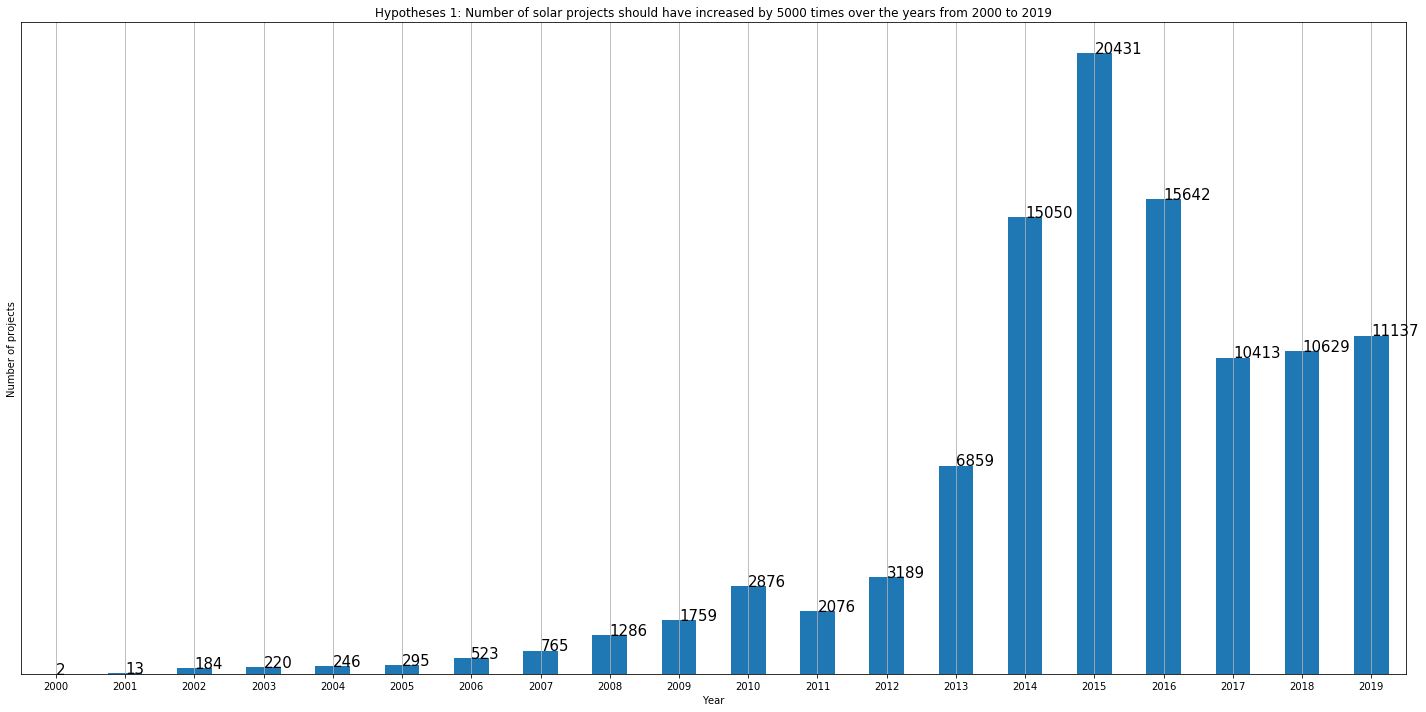

In [14]:
#ref: https://stackoverflow.com/questions/47255746/change-order-on-x-axis-for-matplotlib-chart
#ref :https://stackoverflow.com/questions/30228069/how-to-display-the-value-of-the-bar-on-each-bar-with-pyplot-barh
#ref: https://stackoverflow.com/questions/12998430/remove-xticks-in-a-matplotlib-plot

year_order = df['Date_Application_Received'].dt.year.unique()
year_order.sort()
df['Date_Application_Received'].dt.year.value_counts().loc[year_order].plot.bar(grid=True, rot=0, figsize=(20,10))
plt.xlabel('Year')
plt.ylabel('Number of projects')
plt.yticks([])
for index,data in enumerate(df['Date_Application_Received'].dt.year.value_counts().loc[year_order]):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=15))
plt.title('Hypotheses 1: Number of solar projects should have increased by 5000 times over the years from 2000 to 2019')
plt.tight_layout()

The number projects in 2019 were 11137 and number of projects in 2000 were 2.

So my hypothesis 1 is of true. The number of solar projects in New York have increased by over 5000 times from 2000 to 2019.

I should also consider the fact that the data of the solar projects are only the ones that were reported. There might be other projects that were not reported.

Additionally, if we look at the graph, there was a hugh spike in 2015. 
I have done some research and found that for 2014 Governor elections, Governor Cuomo announced to increase solar projects accross the state as part of his campaigns. This might be a reason for the spike.

References:
https://www.governor.ny.gov/news/governor-cuomo-announces-solar-growth-more-300-percent-2011-2014-new-york-state
https://www.governor.ny.gov/news/governor-cuomo-announces-900-solar-projects-underway-through-26-community-solarize-campaigns-0
https://en.wikipedia.org/wiki/New_York_gubernatorial_elections

## Hypotheses 2

I could use the "Total Nameplate kW DC" and "Project Cost" to calculate the cost of the project per kilowatt (kW) produce over the years from 2000 to 2019. The cost should have reduced by more than 50%.

Text(0.5, 1.0, 'Hypotheses 2: Cost of project to produce per kilowatt (kW) should have reduced by more than 50%')

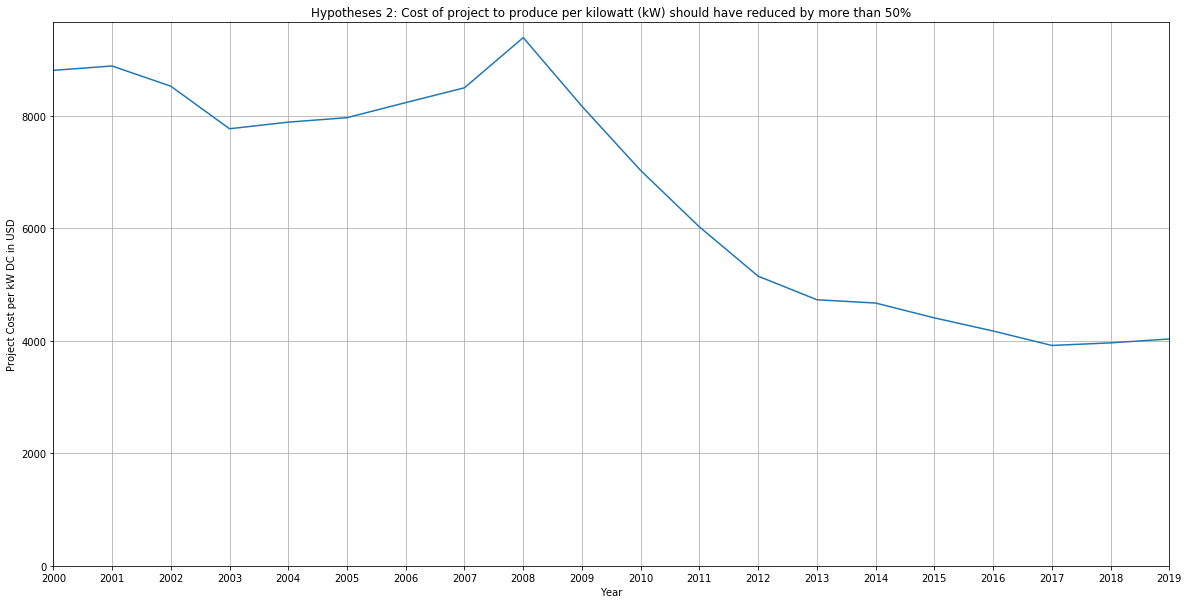

In [15]:
#ref: https://stackoverflow.com/questions/22642511/change-y-range-to-start-from-0-with-matplotlib

df['Project_Cost_per_kW_DC'].groupby(df['Date_Application_Received'].dt.year).mean().plot(grid=True,rot=0, figsize=(20,10))
plt.xlabel('Year')
plt.xticks(df['Date_Application_Received'].dt.year.unique())
plt.ylabel('Project Cost per kW DC in USD')
plt.ylim(ymin=0)
plt.title('Hypotheses 2: Cost of project to produce per kilowatt (kW) should have reduced by more than 50%')

The cost of the project to produce per kilowatt (kW) of DC was around USD 9000 in the year 2000 and around USD 4000 in the year 2019.

So my hypothesis 2 is of true. The cost of the project to produce per kilowatt (kW) of DC over the years from 2000 to 2019 has reduced by more than 50%.

I should also consider the fact that the data of the solar projects are only the ones that were repoted. There might be other projects that were not reported.

If we look at the plot, there was a spike in the cost in 2008.
As per my research, The market almost stalled in late 2008, when the federal tax credit was set to expire. With much pressure from industry groups, Congress extended the credit to 2016. And when the recession tightened credit markets and flattened investors’ profits, making tax credits less attractive, the federal government offered the option of a 30 percent upfront grant instead of the tax credit, as part of the 2009 recovery act.

#ref: https://www.nytimes.com/2010/04/22/business/energy-environment/22SOLAR.html

I should also consider the 0.1 % of nan values in the "Project_Cost_per_kW_DC" column which are in the plot. This might be a cause for the inconsistency.

In [16]:
#Total run time

print((time.time() - start_time)/60,'minutes')
print(time.time() - start_time,'seconds')

0.6242748856544494 minutes
37.457056760787964 seconds
